# Logistic Regression

## Importing the libraries

In [22]:
# pandas, numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [36]:
# extraire la base de données
df =pd.read_csv('Social_Network_Ads - Social_Network_Ads (1).csv')
df.head

<bound method NDFrame.head of      Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]>

#### `Extract X`


In [37]:
# X avec la méthode 'iloc on prend toutes les lignes et les colonnes sauf la dernière
X = df.iloc[:, :-1].values


#### `Extract y`


In [38]:
# y avec la méthode 'iloc on prend toutes les lignes et la dernière colonne
y = df.iloc[:, -1].values


## Splitting the dataset into the Training set and Test set

In [26]:
# Utiliser train_test_split pour diviser les données en données d'entraînement et de test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y,random_state=42)


In [27]:
# Afficher les premières lignes de chaque ensemble
print("X_train (première ligne) :\n", x_train[:1])
print("\ny_train (premier cible) :\n", y_train[:1])

print("\nX_test (première ligne):\n", x_test[:1])
print("\ny_test (premier cible)) :\n", y_test[:1])


X_train (première ligne) :
 [[    54 108000]]

y_train (premier cible) :
 [1]

X_test (première ligne):
 [[   58 38000]]

y_test (premier cible)) :
 [1]


## Feature Scaling

In [28]:
# Utiliser StandardScaler pour mettre à l'échelle les données
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Training the Logistic Regression model on the Training set

#### `Import` your model


In [29]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=42)


In [30]:
# Créer un modèle de logistic regression


#### `Train` your model

In [31]:
classifier.fit(x_train, y_train)

LogisticRegression(random_state=42)

## Predicting the test set results

In [32]:
y_pred = classifier.predict(x_test)


## Making the Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[26  0]
 [ 5  9]]


## Making Roc Curve

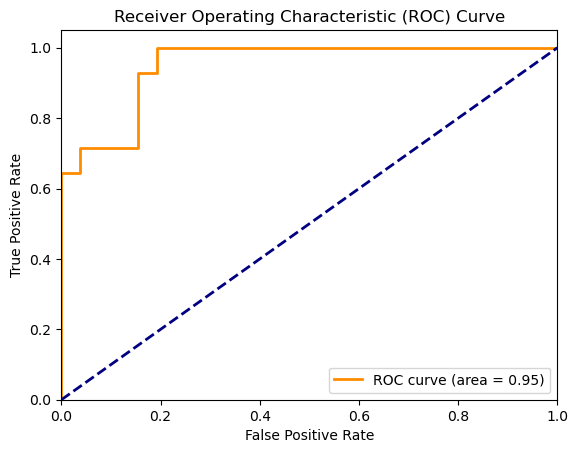

In [34]:
fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Visualising the Test set results

C:\Users\monce\AppData\Local\Temp\ipykernel_27476\3364529698.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


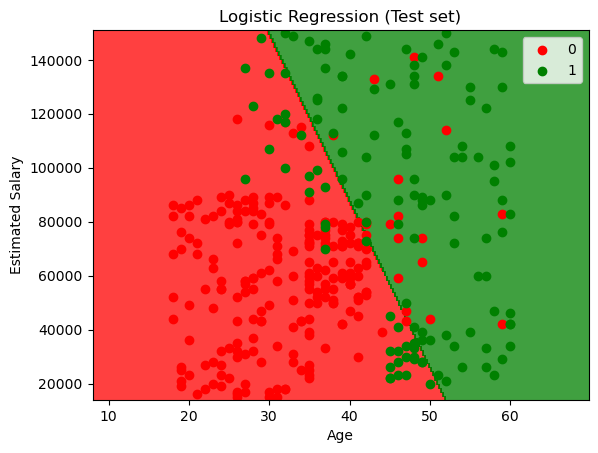

In [44]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min() - 10, X_set[:, 0].max() + 10,  0.25),
                     np.arange(X_set[:, 1].min() - 1000, X_set[:, 1].max() + 1000, 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()